# **Regularization**

Before discussing about regularization, we need to know what is **Overfitting** and what is Bias & Variance of a model and trade-off between them.


**Bias** refers to the error introduced by approximating a real-world problem with a simplified model.

**Variance** measures how much the model's predictions vary for different training datasets.

# Graphical Representation of Bias and Variance of a Model

We can create a graphical visualization of bias and variance using a bulls-eye diagram. Imagine that the center of the target is a model that perfectly predicts the correct values. As we move away from the bulls-eye, our predictions get worse and worse. Imagine we can repeat our entire model building process to get a number of separate hits on the target. Each hit represents an individual realization of our model, given the chance variability in the training data we gather. Sometimes we will get a good distribution of training data so we predict very well and we are close to the bulls-eye, while sometimes our training data might be full of outliers or non-standard values resulting in poorer predictions. These different realizations result in a scatter of hits on the target.

In [ ]:
import pandas as pd
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

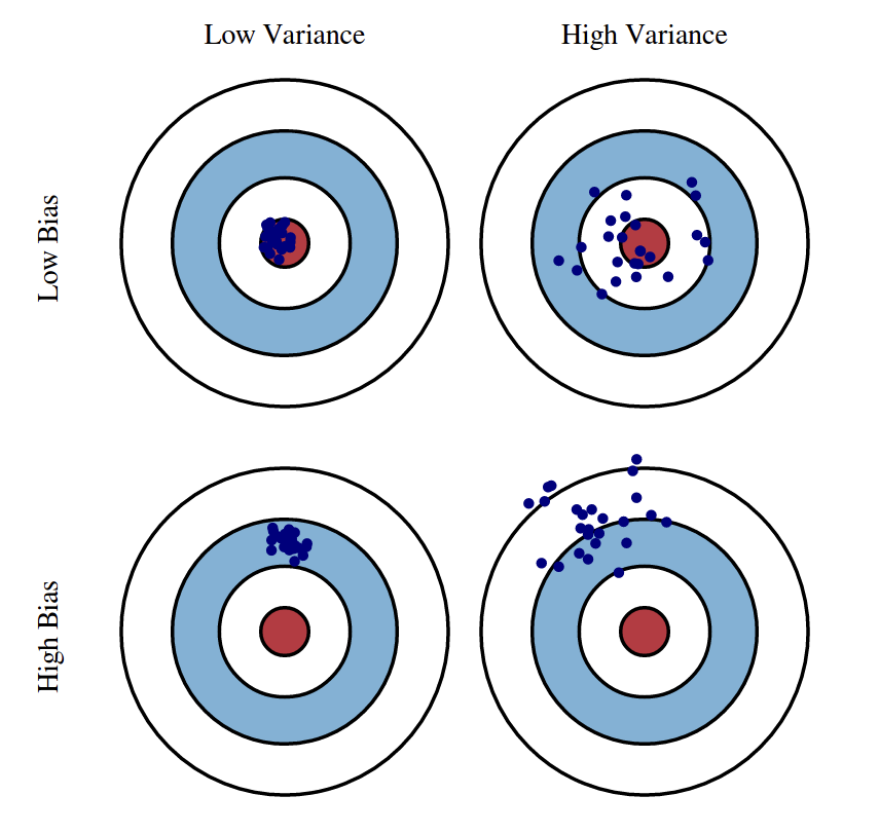

In [ ]:
display(Image(filename='bias-variance.png'))

# The Bias-Variance Trade-off

If we denote the variable we are trying to predict as $Y$
 and our features as $X$, we may assume that there is a relationship relating one to the other such as $Y = f(X) + ε$, where, the error term ε is normally distributed with a mean of zero like so $ε ∼ N(0,σ_ε^2)$.

We can estimate a hypothesis $h \in H$ using any machine learning technique. In this case, the expected squared prediction error at a point X is:

$$
\text{Err}(X) = E[(Y - h(X))^2]
$$

This can be further decomposed into **Bias** and **Variance** components as following -

$$
\text{Err}(X) = (E[h(X)] - f(X))^2 + E[(h(X) - E[h(X)])^2] + \sigma_e^2
$$

$$
\text{Err}(x) = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$

That third term, irreducible error, is the noise term in the true relationship that cannot fundamentally be reduced by any model. Given the true model and infinite data to calibrate it, we should be able to reduce both the bias and variance terms to 0. However, in a world with imperfect models and finite data, there is a tradeoff between minimizing the bias and minimizing the variance. The **Bias-Variance Trade-off** is shown in the following figure.

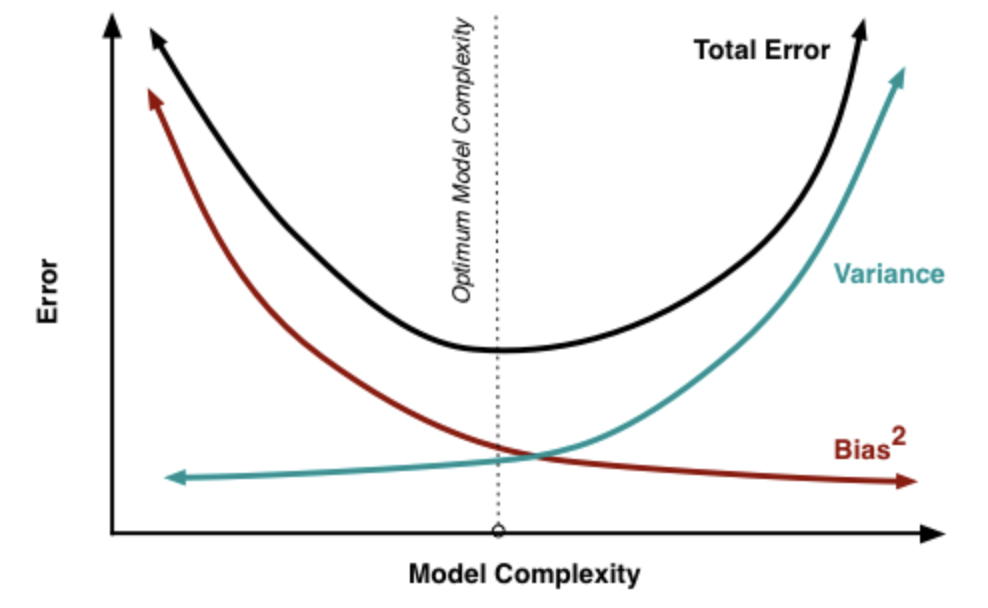

In [ ]:
display(Image(filename='bias-variance trade-off.png'))

When creating a model, our goal is to locate the optimum model complexity. If our model complexity exceeds this sweet spot, we are in effect **Overfitting** our model; while if our complexity falls short of the sweet spot, we are **Underfitting** the model. With all of that in mind, the notion of regularization is simply a useful technique to use when we think our model is too complex (models that have low bias, but high variance). It is a method for "constraining" or "regularizing" the size of the coefficients ("shrinking" them towards zero). The specific regularization techniques we'll be discussing are Ridge Regression, Lasso Regression and Elastic Net Regression.

# Regularization in general

Following is the formulation of the optimization problem for **Regularization**.

$$
\min_{w} \frac{1}{m} \sum_{i=1}^{m} \ell(h_w(x_i), y_i) + \lambda r(w)
$$

$$
\begin{aligned}
&\text{Where -} \\
&h_w \quad = \text{Hypothesis } (\in H) \\
&\ell(h_w(x_i), y_i) \quad = \text{Loss function} \\
&m \quad = \text{Sample size} \\
&r(w) \quad = \text{Regularizer}
\end{aligned}
$$




# Ridge Regression (L2 Regularization)

In a regression setup, the optimization problem for **Regularization** is called **Ridge Regression** if -

$\ell(h_w(x_i), y_i) = (h_w(x_i) - y_i)^2$

$r(w) = ||\tilde{w} ||_2^2$ where $\tilde{w}$ is vector of coefficients excluding the constant term.

Mathematically,

$$
\text{Hypothesis:} \quad h_w(x_i) = w_0 + \sum_{j=1}^{p} w_j x_{ij}
$$

$$
\text{Loss Function:} \quad \ell(h_w(x_i), y_i) = \left(y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij}\right)^2
$$

$$
\text{Regularizer:} \quad r(w) = \left(\sum_{j=1}^{p} w_j^2\right)^{\frac{1}{2}}
$$

---

Hence, a typical Ridge Regression problem becomes:

$$
\min_{w} \left[\frac{1}{m} \sum_{i=1}^{m} \left(y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij}\right)^2 + \lambda \left(\sum_{j=1}^{p} w_j^2\right)^{\frac{1}{2}}\right]
$$


## Ordinary Least Squares (OLS) Parameter Estimation

$$
J(\mathbf{w}) = \sum_{i=1}^{m} (y_i - \mathbf{x}_i^\top \mathbf{w})^2
$$


### Objective Function in Matrix Form  

$$
J(\mathbf{w}) = (\mathbf{y} - \mathbf{Xw})^\top (\mathbf{y} - \mathbf{Xw})
$$


### Gradient Calculation  

$$
\nabla J(\mathbf{w}) = -2\mathbf{X}^\top (\mathbf{y} - \mathbf{Xw})
$$

### Optimal OLS Parameter  

$$
\mathbf{w}_{OLS} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
$$


## Ridge Regression Parameter Estimation

$$
J(\mathbf{w}) = \sum_{i=1}^{m} (y_i - \mathbf{x}_i^\top \mathbf{w})^2 + \lambda \sum_{j=1}^{p} w_j^2
$$

In matrix form:  

$$
J(\mathbf{w}) = (\mathbf{y} - \mathbf{Xw})^\top (\mathbf{y} - \mathbf{Xw}) + \lambda \mathbf{w}^\top \mathbf{w}
$$


### Gradient Calculation  

$$
\nabla J(\mathbf{w}) = -2\mathbf{X}^\top (\mathbf{y} - \mathbf{Xw}) + 2\lambda \mathbf{w}
$$

### Optimal Ridge Parameter  

$$
\mathbf{w}_{\text{Ridge}} = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^\top \mathbf{y}
$$


# Ridge Regression in action

Ridge Regression is essentially used to tackle 2 problems -

- Overfitting problem
- Multicollinearity problem

## Overfitting Problem

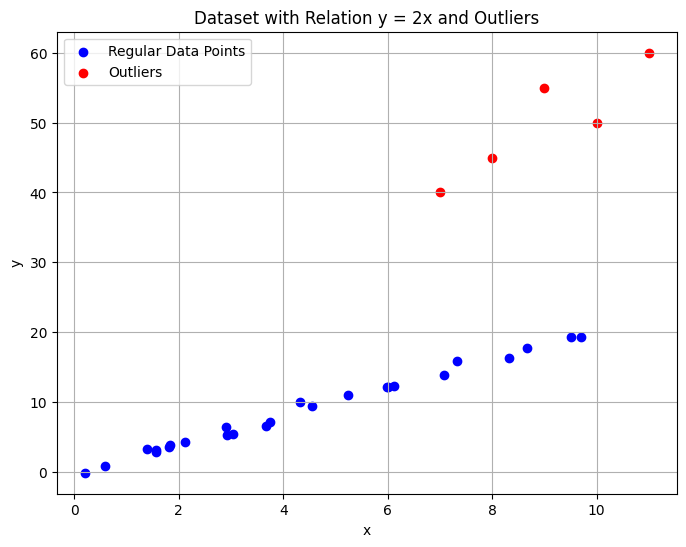

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 25 data points with the relation y = 2x + noise
x = np.random.rand(25) * 10  # Random x values between 0 and 10
y = 2 * x + np.random.randn(25) * 0.5  # y = 2x with small noise

# Add 5 outliers
x_outliers = [7, 8, 9, 10, 11]
y_outliers = [40, 45, 55, 50, 60]

# Combine the data points and outliers
x_combined = np.concatenate([x, x_outliers])
y_combined = np.concatenate([y, y_outliers])

# Add intercept term (bias) to X
X = np.vstack([np.ones(len(x_combined)), x_combined]).T

# Create a DataFrame for visualization
data = pd.DataFrame({'x': x_combined, 'y': y_combined})

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x_combined[:25], y_combined[:25], label='Regular Data Points', color='blue')
plt.scatter(x_combined[25:], y_combined[25:], label='Outliers', color='red')
plt.title('Dataset with Relation y = 2x and Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


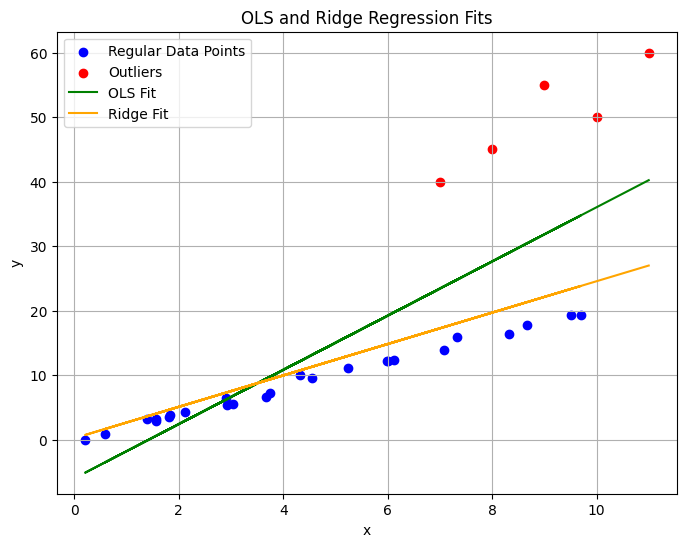

In [ ]:
# Fit OLS using formula: w_OLS = (X^T X)^-1 X^T y
w_ols = np.linalg.inv(X.T @ X) @ X.T @ y_combined

# Fit Ridge using formula: w_Ridge = (X^T X + lambda * I)^-1 X^T y
lambda_ridge = 400.0
ridge_term = lambda_ridge * np.eye(X.shape[1])  # Regularization term (lambda * I)
w_ridge = np.linalg.inv(X.T @ X + ridge_term) @ X.T @ y_combined

# Predictions for both models
y_pred_ols = X @ w_ols
y_pred_ridge = X @ w_ridge

# Plot the data points and regression lines
plt.figure(figsize=(8, 6))

# Scatter plot of regular data points and outliers
plt.scatter(x_combined[:25], y_combined[:25], label='Regular Data Points', color='blue')
plt.scatter(x_combined[25:], y_combined[25:], label='Outliers', color='red')

# Plot OLS fit line
plt.plot(x_combined, y_pred_ols, label='OLS Fit', color='green')

# Plot Ridge fit line
plt.plot(x_combined, y_pred_ridge, label='Ridge Fit', color='orange')

# Add labels and legend
plt.title('OLS and Ridge Regression Fits')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Multicollinearity Problem

In [ ]:
# Perfectly correlated features
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])  # X2 = 2 * X1
y = np.array([5, 9, 13, 17])  # Target variable

# Add intercept term to X
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

print("Feature Matrix (X):")
print(X_with_intercept)
print("Target Vector (y):")
print(y)


Feature Matrix (X):
[[1. 1. 2.]
 [1. 2. 4.]
 [1. 3. 6.]
 [1. 4. 8.]]
Target Vector (y):
[ 5  9 13 17]


In [ ]:
# OLS formula: w_OLS = (X^T X)^-1 X^T y
try:
    w_ols = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    print("OLS Coefficients:", w_ols)
except np.linalg.LinAlgError as e:
    print("Error in OLS Fit:", e)


Error in OLS Fit: Singular matrix


### Why OLS Fails

- OLS requires the inversion of $X^\top X$.
- In this case, $X_2$ is perfectly correlated with $X_1$ according to the relation $X_2 = 2 X_1$.
- This causes $X^\top X$ to become singular (non-invertible), as one feature is a linear combination of another.
- As a result, OLS cannot compute the coefficients due to the inability to invert $X^\top X$.

### Solution: Ridge Regression

Ridge Regression adds a regularization term $\lambda I$ to $X^\top X$, making it invertible even when features are perfectly correlated.


In [ ]:
import plotly.graph_objects as go

# Define perfectly correlated features
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])  # X2 = 2 * X1
y = np.array([5, 9, 13, 17])  # Target variable

# Add intercept term to X
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

# Ridge fit using formula: w_Ridge = (X^T X + lambda * I)^-1 X^T y
lambda_ridge = 1.0
ridge_term = lambda_ridge * np.eye(X_with_intercept.shape[1])  # Regularization term (lambda * I)
ridge_term[0, 0] = 0  # Do not regularize the intercept term

w_ridge = np.linalg.inv(X_with_intercept.T @ X_with_intercept + ridge_term) @ X_with_intercept.T @ y

# Generate predictions for visualization
def ridge_hyperplane(X1, X2, w):
    return w[0] + w[1] * X1 + w[2] * X2

# Create a grid for X1 and X2
X1_grid, X2_grid = np.meshgrid(np.linspace(0, 5, 10), np.linspace(0, 10, 10))
y_grid = ridge_hyperplane(X1_grid, X2_grid, w_ridge)

# Create the Plotly figure
fig = go.Figure()

# Add scatter points for the data
fig.add_trace(go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
))

# Add the Ridge Regression hyperplane
fig.add_trace(go.Surface(
    x=X1_grid,
    y=X2_grid,
    z=y_grid,
    colorscale='Reds',
    opacity=0.7,
    name='Ridge Hyperplane'
))

# Update layout for better visualization
fig.update_layout(
    title="Ridge Regression Hyperplane",
    scene=dict(
        xaxis_title="Feature X1",
        yaxis_title="Feature X2",
        zaxis_title="Target y"
    ),
)

# Show the plot
fig.show()


## Why is it called **Ridge Regression**?

In [ ]:
# Generate perfectly correlated features
X1 = np.linspace(1, 10, 10)  # Feature X1
X2 = 2 * X1  # Feature X2 (perfectly correlated with X1)

# Target variable y
np.random.seed(42)
y = 3 * X1 + 2 * X2 + np.random.randn(10) * 0.5  # Linear relation with noise

# Combine features into a dataset
X = np.column_stack((X1, X2))

# Define the OLS loss function
def ols_loss(w1, w2, X, y):
    w = np.array([w1, w2])
    predictions = X @ w
    residuals = y - predictions
    return 0.5 * np.sum(residuals**2)

# Define the Ridge loss function
def ridge_loss(w1, w2, X, y, lambda_ridge):
    w = np.array([w1, w2])
    predictions = X @ w
    residuals = y - predictions
    regularization = lambda_ridge * np.sum(w**2)
    return np.sum(residuals**2) + regularization

# Ridge regularization parameter
lambda_ridge = 10000.0

# Create a grid of w1 and w2 values
w1_range = np.linspace(-10, 10, 100)
w2_range = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Compute the loss surfaces
ols_loss_surface = np.zeros_like(W1)
ridge_loss_surface = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        ols_loss_surface[i, j] = ols_loss(W1[i, j], W2[i, j], X, y)
        ridge_loss_surface[i, j] = ridge_loss(W1[i, j], W2[i, j], X, y, lambda_ridge)

# Create the Plotly figures
fig_ols = go.Figure()
fig_ols.add_trace(go.Surface(
    x=W1,
    y=W2,
    z=ols_loss_surface,
    colorscale='Viridis',
    opacity=0.8,
    name='OLS Loss Surface'
))

fig_ols.update_layout(
    title="OLS Loss Surface with Perfectly Correlated Features",
    scene=dict(
        xaxis_title="Weight w1",
        yaxis_title="Weight w2",
        zaxis_title="Loss",
    ),
)

fig_ridge = go.Figure()
fig_ridge.add_trace(go.Surface(
    x=W1,
    y=W2,
    z=ridge_loss_surface,
    colorscale='Viridis',
    opacity=0.8,
    name='Ridge Loss Surface'
))

fig_ridge.update_layout(
    title="Ridge Loss Surface with Perfectly Correlated Features",
    scene=dict(
        xaxis_title="Weight w1",
        yaxis_title="Weight w2",
        zaxis_title="Loss",
    ),
)

# Show the interactive plots
fig_ols.show()
fig_ridge.show()


### Conclusion

- Strictly Convex, Differentiable

- Uses weights on all features, i.e. relies on all features to some degree (ideally we would like to avoid this if all the features are not important to us) - these are known as Dense Solutions.

# LASSO Regression (L1 Regularization)

In a regression setup, the optimization problem for **Regularization** is called **LASSO [Least Absolute Shrinkage & Selection Operator] Regression** if -

$\ell(h_w(x_i), y_i) = (h_w(x_i) - y_i)^2$

$r(w) = ||\tilde{w} ||_1$ where $\tilde{w}$ is vector of coefficients excluding the constant term.

Mathematically,

$$
\text{Hypothesis:} \quad h_w(x_i) = w_0 + \sum_{j=1}^{p} w_j x_{ij}
$$

$$
\text{Loss Function:} \quad \ell(h_w(x_i), y_i) = \left(y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij}\right)^2
$$

$$
\text{Regularizer:} \quad r(w) = \sum_{j=1}^{p} |w_j|
$$

---

Hence, a typical LASSO Regression problem becomes:

$$
\min_{w} \left[\frac{1}{m} \sum_{i=1}^{m} \left(y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij}\right)^2 + \lambda \sum_{j=1}^{p} |w_j|\right]
$$


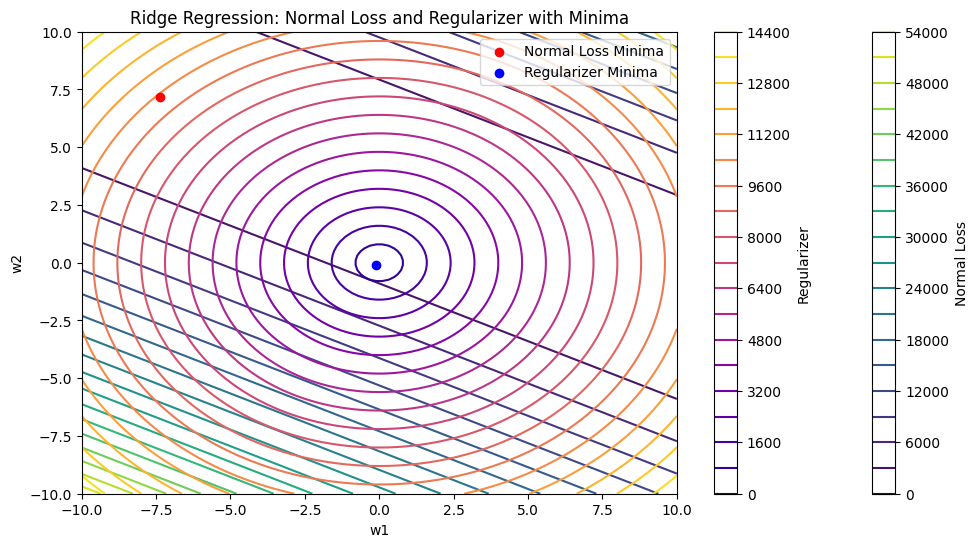

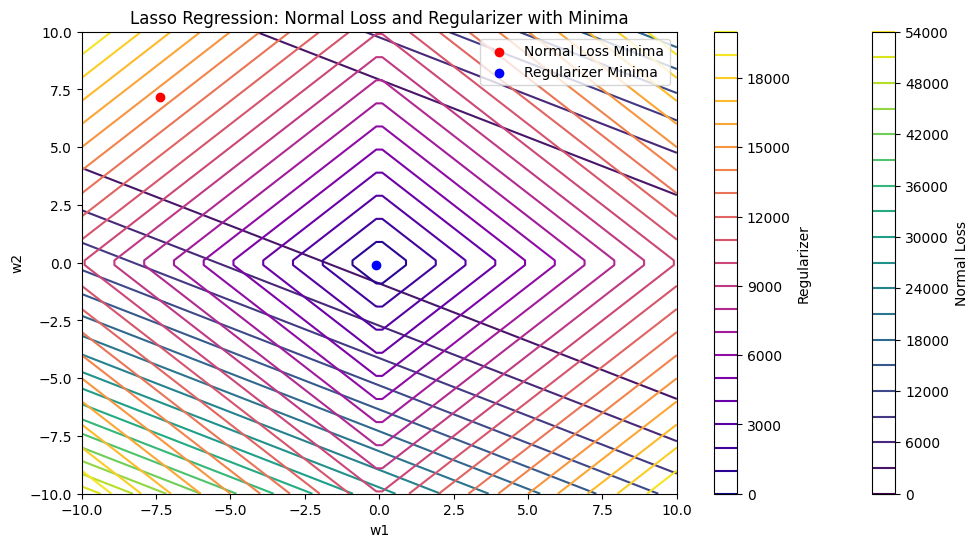

In [ ]:
# Define Ridge and Lasso loss components
lambda_ridge = 1000.0
lambda_lasso = 1000.0

def ridge_normal_loss(w1, w2, X, y):
    w = np.array([w1, w2])
    predictions = X @ w
    residuals = y - predictions
    return np.mean(residuals**2)

def ridge_regularizer(w1, w2):
    return lambda_ridge * np.sqrt(w1**2 + w2**2)

def lasso_normal_loss(w1, w2, X, y):
    w = np.array([w1, w2])
    predictions = X @ w
    residuals = y - predictions
    return np.mean(residuals**2)

def lasso_regularizer(w1, w2):
    return lambda_lasso * (np.abs(w1) + np.abs(w2))

# Compute Ridge loss surfaces
ridge_normal_loss_surface = np.zeros_like(W1)
ridge_regularizer_surface = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        ridge_normal_loss_surface[i, j] = ridge_normal_loss(W1[i, j], W2[i, j], X, y)
        ridge_regularizer_surface[i, j] = ridge_regularizer(W1[i, j], W2[i, j])

# Compute Lasso loss surfaces
lasso_normal_loss_surface = np.zeros_like(W1)
lasso_regularizer_surface = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        lasso_normal_loss_surface[i, j] = lasso_normal_loss(W1[i, j], W2[i, j], X, y)
        lasso_regularizer_surface[i, j] = lasso_regularizer(W1[i, j], W2[i, j])

# Find minima for Ridge
ridge_min_normal_idx = np.unravel_index(np.argmin(ridge_normal_loss_surface), ridge_normal_loss_surface.shape)
ridge_min_regularizer_idx = np.unravel_index(np.argmin(ridge_regularizer_surface), ridge_regularizer_surface.shape)

ridge_min_normal_w1 = W1[ridge_min_normal_idx]
ridge_min_normal_w2 = W2[ridge_min_normal_idx]
ridge_min_regularizer_w1 = W1[ridge_min_regularizer_idx]
ridge_min_regularizer_w2 = W2[ridge_min_regularizer_idx]

# Find minima for Lasso
lasso_min_normal_idx = np.unravel_index(np.argmin(lasso_normal_loss_surface), lasso_normal_loss_surface.shape)
lasso_min_regularizer_idx = np.unravel_index(np.argmin(lasso_regularizer_surface), lasso_regularizer_surface.shape)

lasso_min_normal_w1 = W1[lasso_min_normal_idx]
lasso_min_normal_w2 = W2[lasso_min_normal_idx]
lasso_min_regularizer_w1 = W1[lasso_min_regularizer_idx]
lasso_min_regularizer_w2 = W2[lasso_min_regularizer_idx]

# Plot Ridge contour plots with minima highlighted
plt.figure(figsize=(12, 6))
contours_ridge_normal = plt.contour(W1, W2, ridge_normal_loss_surface, levels=20, cmap='viridis')
plt.scatter(ridge_min_normal_w1, ridge_min_normal_w2, color='red', label='Normal Loss Minima', zorder=5)
contours_ridge_regularizer = plt.contour(W1, W2, ridge_regularizer_surface, levels=20, cmap='plasma')
plt.scatter(ridge_min_regularizer_w1, ridge_min_regularizer_w2, color='blue', label='Regularizer Minima', zorder=5)
plt.title('Ridge Regression: Normal Loss and Regularizer with Minima')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar(contours_ridge_normal).set_label('Normal Loss')
plt.colorbar(contours_ridge_regularizer).set_label('Regularizer')
plt.legend()
plt.show()

# Plot Lasso contour plots with minima highlighted
plt.figure(figsize=(12, 6))
contours_lasso_normal = plt.contour(W1, W2, lasso_normal_loss_surface, levels=20, cmap='viridis')
plt.scatter(lasso_min_normal_w1, lasso_min_normal_w2, color='red', label='Normal Loss Minima', zorder=5)
contours_lasso_regularizer = plt.contour(W1, W2, lasso_regularizer_surface, levels=20, cmap='plasma')
plt.scatter(lasso_min_regularizer_w1, lasso_min_regularizer_w2, color='blue', label='Regularizer Minima', zorder=5)
plt.title('Lasso Regression: Normal Loss and Regularizer with Minima')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar(contours_lasso_normal).set_label('Normal Loss')
plt.colorbar(contours_lasso_regularizer).set_label('Regularizer')
plt.legend()
plt.show()


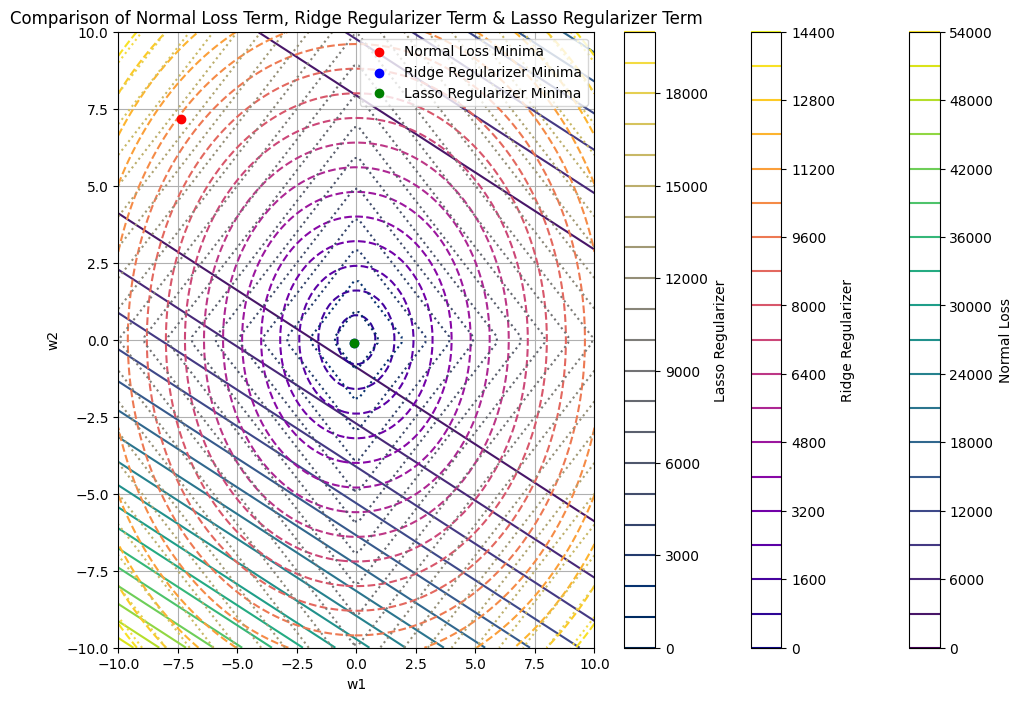

In [ ]:
# Define the loss components
lambda_ridge = 1000.0
lambda_lasso = 1000.0

def normal_loss(w1, w2, X, y):
    w = np.array([w1, w2])
    predictions = X @ w
    residuals = y - predictions
    return np.mean(residuals**2)

def ridge_regularizer(w1, w2):
    return lambda_ridge * np.sqrt(w1**2 + w2**2)

def lasso_regularizer(w1, w2):
    return lambda_lasso * (np.abs(w1) + np.abs(w2))

# Compute the loss surfaces
normal_loss_surface = np.zeros_like(W1)
ridge_regularizer_surface = np.zeros_like(W1)
lasso_regularizer_surface = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        normal_loss_surface[i, j] = normal_loss(W1[i, j], W2[i, j], X, y)
        ridge_regularizer_surface[i, j] = ridge_regularizer(W1[i, j], W2[i, j])
        lasso_regularizer_surface[i, j] = lasso_regularizer(W1[i, j], W2[i, j])

# Find minima for each term
normal_min_idx = np.unravel_index(np.argmin(normal_loss_surface), normal_loss_surface.shape)
ridge_min_idx = np.unravel_index(np.argmin(ridge_regularizer_surface), ridge_regularizer_surface.shape)
lasso_min_idx = np.unravel_index(np.argmin(lasso_regularizer_surface), lasso_regularizer_surface.shape)

normal_min_w1, normal_min_w2 = W1[normal_min_idx], W2[normal_min_idx]
ridge_min_w1, ridge_min_w2 = W1[ridge_min_idx], W2[ridge_min_idx]
lasso_min_w1, lasso_min_w2 = W1[lasso_min_idx], W2[lasso_min_idx]

# Plot all three terms in a single plot with minima highlighted
plt.figure(figsize=(12, 8))

# Normal Loss Term
contours_normal_loss = plt.contour(W1, W2, normal_loss_surface, levels=20, cmap='viridis', linestyles='solid')
plt.scatter(normal_min_w1, normal_min_w2, color='red', label='Normal Loss Minima', zorder=5)

# Ridge Regularizer Term
contours_ridge_regularizer = plt.contour(W1, W2, ridge_regularizer_surface, levels=20, cmap='plasma', linestyles='dashed')
plt.scatter(ridge_min_w1, ridge_min_w2, color='blue', label='Ridge Regularizer Minima', zorder=5)

# Lasso Regularizer Term
contours_lasso_regularizer = plt.contour(W1, W2, lasso_regularizer_surface, levels=20, cmap='cividis', linestyles='dotted')
plt.scatter(lasso_min_w1, lasso_min_w2, color='green', label='Lasso Regularizer Minima', zorder=5)

# Add title and labels
plt.title('Comparison of Normal Loss Term, Ridge Regularizer Term & Lasso Regularizer Term')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar(contours_normal_loss).set_label('Normal Loss')
plt.colorbar(contours_ridge_regularizer).set_label('Ridge Regularizer')
plt.colorbar(contours_lasso_regularizer).set_label('Lasso Regularizer')
plt.legend()
plt.grid(True)
plt.show()


## Zoomed out view

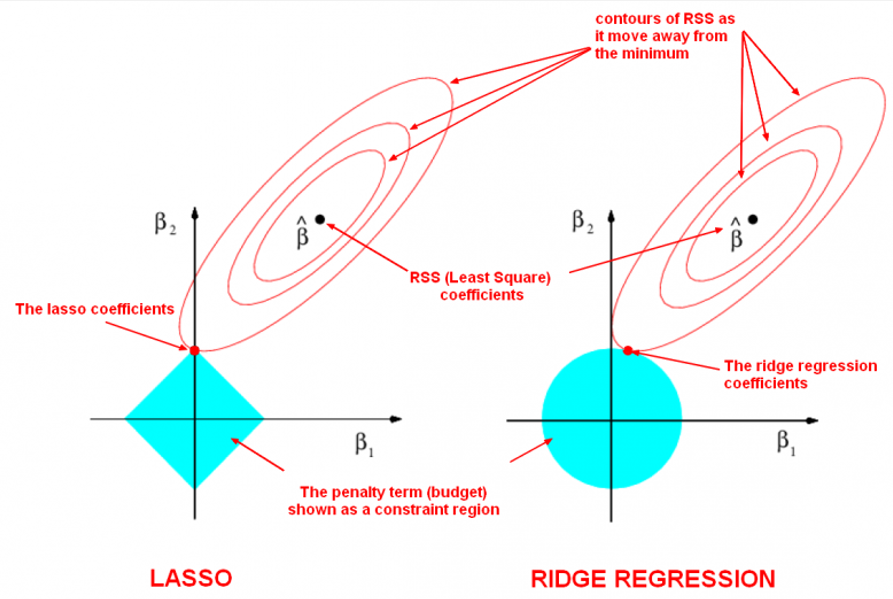

In [ ]:
display(Image(filename='ridge_lasso.png'))

### Conclusion

- Convex (but not strictly)
- Not differentiable at 0 (the point which minimization is intended to bring us to)
- In-built feature selection property
- Sparse (i.e. not Dense) Solutions

# Elastic Net (L1 + L2 Regularization)

In a regression setup, the optimization problem for **Regularization** is called **Elastic Net Regression** if -

$\ell(h_w(x_i), y_i) = (h_w(x_i) - y_i)^2$

$r(w) = \lambda_1||\tilde{w} ||_1 + \lambda_2||\tilde{w}||_2^2$ where $\tilde{w}$ is vector of coefficients excluding the constant term.

Mathematically,

$$
\text{Hypothesis:} \quad h_w(x_i) = w_0 + \sum_{j=1}^{p} w_j x_{ij}
$$

$$
\text{Loss Function:} \quad \ell(h_w(x_i), y_i) = \left(y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij}\right)^2
$$

$$
\text{Regularizer:} \quad r(w) = \lambda_1 \sum_{j=1}^{p}|w_j| + \lambda_2(\sum_{j=1}^{p}|w_j|^2)^\frac{1}{2}
$$

$$
\lambda_1 > 0, \lambda_2 > 0
$$

---

Hence, a typical Elastic Net regression problem becomes:

$$
\min_{w} \left[\frac{1}{m} \sum_{i=1}^{m} \left(y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij}\right)^2 + \lambda_1 \sum_{j=1}^{p}|w_j| + \lambda_2(\sum_{j=1}^{p}|w_j|^2)^\frac{1}{2}\right]
$$


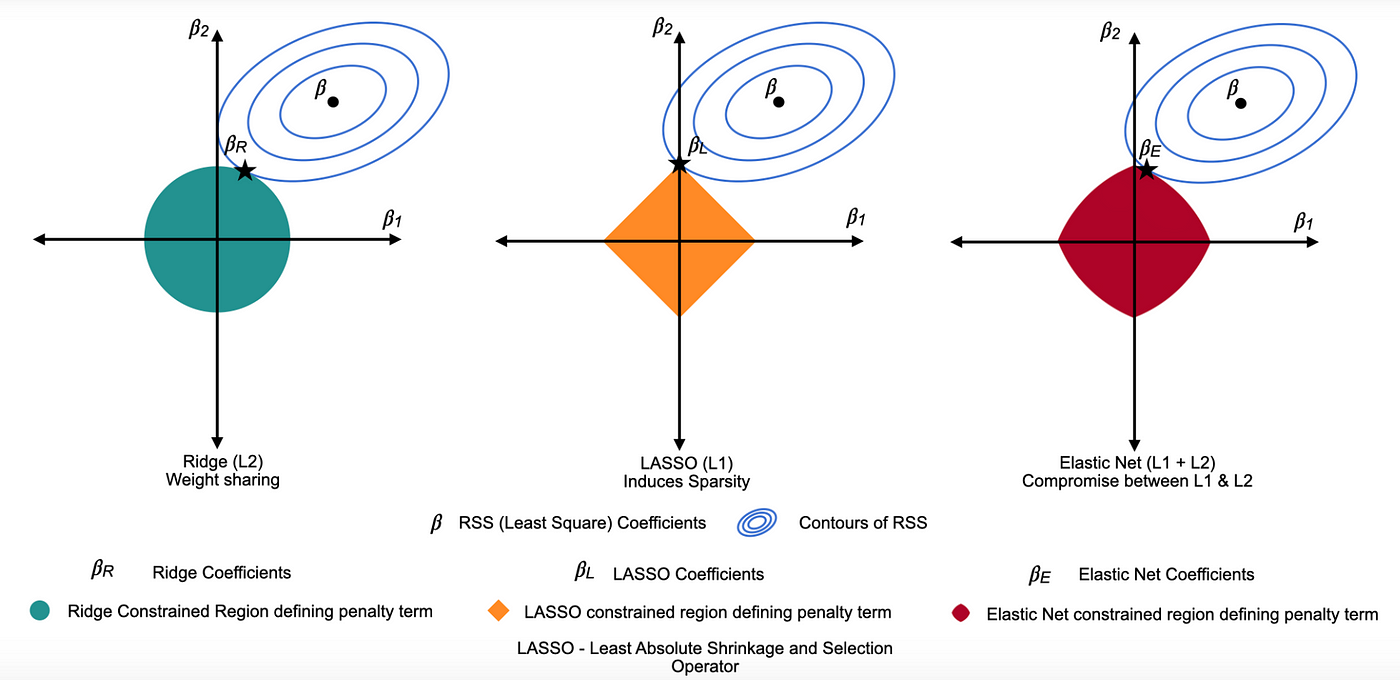

In [ ]:
display(Image(filename='ridge_lasso_elasticNet.png'))

### Conclusion

- Strictly convex (i.e unique solution)
- By choosing $\lambda_1$ \& $\lambda_2$ sparsity can be induced
- Not differentiable everywhere

# Application on practical problem

### **Load the dataset**

In [ ]:
from sklearn.datasets import load_diabetes
df = load_diabetes()


In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
df1 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df1.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


# **Data processing**

### **Splitting into X and y**

In [ ]:
unscaled_X = df.data
y = df.target

### **Scaling**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(unscaled_X)

### **Spliting into train and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Linear Regression Model**

In [ ]:
lr = LinearRegression()

# Train the model
model_lr = lr.fit(X_train, y_train)

# Prediction
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_lr)))
print('Testing accuracy : {}\n'.format(r2_score(y_test, y_pred_test_lr)))

Training accuracy : 0.5539250081377072

Testing accuracy : 0.33223321731061806



### **Mean Squared Error**

In [ ]:
mse=cross_val_score(lr, X, y, scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(-(mean_mse).round(5))

2993.08131


### **Horizontal Barplot for observing the significance of each features**

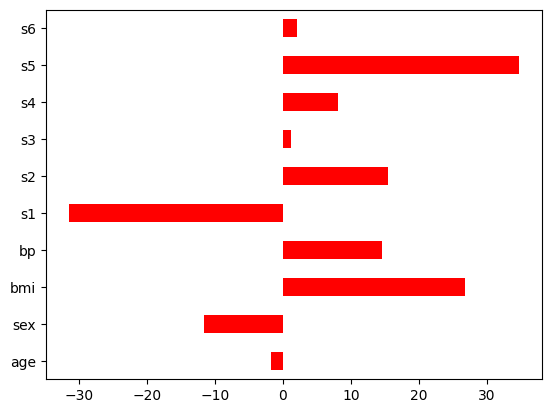

In [ ]:
coefs = pd.Series(lr.coef_, index = df.feature_names)
coefs.plot(kind = 'barh', cmap = 'autumn')
plt.show()

# **Ridge Regression**

In [ ]:
ridge1 = Ridge()

# Fit the model
model_ridge1 = ridge1.fit(X_train, y_train)

# Prediction
y_pred_train_ridge1 = ridge1.predict(X_train)
y_pred_test_ridge1 = ridge1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_ridge1)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_ridge1)))

Training accuracy : 0.5537818217533376

Testing accuracy : 0.33106342873379846


### **Mean Squared Error**

In [ ]:
mse1 = cross_val_score(ridge1, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)
print(-(mean_mse1).round(5))

2993.63929


### **Horizontal Barplot for observing the significance of each features**

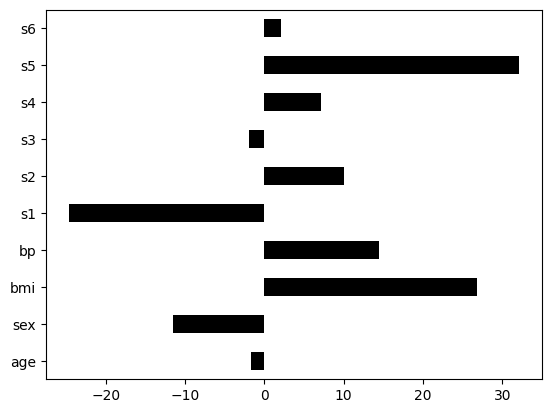

In [ ]:
coefs_ridge1 = pd.Series(ridge1.coef_, index = df.feature_names)
coefs_ridge1.plot(kind = 'barh', cmap = 'gist_heat')
plt.show()

# **LASSO Regression**

In [ ]:
lasso1 = Lasso()

# Fit the model
model_lasso1 = lasso1.fit(X_train, y_train)

# Prediction
y_pred_train_lasso1 = lasso1.predict(X_train)
y_pred_test_lasso1 = lasso1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_lasso1)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_lasso1)))

Training accuracy : 0.5504972050568253

Testing accuracy : 0.3343586610242273


### **Mean Squared Error**

In [ ]:
mse3 = cross_val_score(lasso1, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse3 = np.mean(mse3)
print(-(mean_mse3).round(5))

2994.07544


### **Horizontal Barplot for observing the significance of each features**

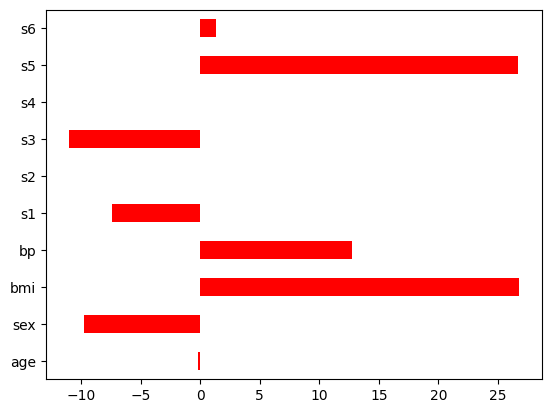

In [ ]:
coefs_lasso1 = pd.Series(lasso1.coef_, index = df.feature_names)
coefs_lasso1.plot(kind = 'barh', cmap = 'autumn')
plt.show()

# **Elastic Net Regression**

In [ ]:
enet1 = ElasticNet()

# Fit the model
model_enet1 = enet1.fit(X_train, y_train)

# Prediction
y_pred_train_enet1 = enet1.predict(X_train)
y_pred_test_enet1 = enet1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_enet1)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_enet1)))

Training accuracy : 0.5192262848796967

Testing accuracy : 0.35694981646970236


### **Mean Squared Error**

In [ ]:
mse5 = cross_val_score(enet1, X, y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse5 = np.mean(mse5)
print(-(mean_mse5).round(5))

3139.59263


### **Horizontal Barplot for observing the significance of each features**

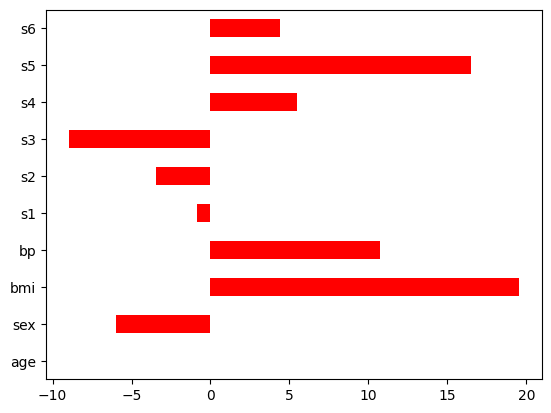

In [ ]:
coefs_enet1 = pd.Series(enet1.coef_, index = df.feature_names)
coefs_enet1.plot(kind = 'barh', cmap = 'autumn')
plt.show()

# **Conclusion**
### **Linear Regression**

Training accuracy : 0.55393

Testing accuracy : 0.33222


### **Ridge Regression**
Training accuracy : 0.55379

Testing accuracy : 0.33105



### **LASSO Regression**
Training accuracy : 0.5505

Testing accuracy : 0.33435


### **Elastic Net Regression**
Training accuracy : 0.51923

Testing accuracy : 0.35694

<br>

From the scores mentined above, we are seeing that Elastic Net Regression performs well. It reduces overfitting along with increases the testing accuracy.

